In [ ]:
# -*- coding: utf-8 -*-
"""
Car Assembly Error Detection - Binary Classification (Fully Integrated)

This notebook implements a complete pipeline for binary classification
(error vs. no_error) of car assembly images.

It incorporates all discussions:
- Robust installation process.
- Google Drive integration.
- Custom background removal (simple image processing) for all splits.
- Unified ImageFolder usage for all splits (assuming /train/good, /train/bad etc.).
- Enhanced data augmentation for training.
- ResNet18 model with frozen base layers (transfer learning).
- Weighted Cross-Entropy Loss for class imbalance.
- Learning Rate Scheduling (ReduceLROnPlateau).
- Early Stopping to prevent overfitting.
- Comprehensive training loop with validation monitoring.
- Single image prediction with custom pre-processing.
- Custom Grad-CAM visualization for model interpretability.
- Full test set evaluation with classification report and confusion matrix.

Author: Your AI Assistant
Date: July 12, 2025
"""

# --- Section 0: Initial Setup and Library Installation ---
# This cell should be run FIRST. After it completes, you MUST manually restart the runtime.
# Go to 'Runtime' -> 'Restart runtime' in the Colab menu.
# After restarting, run all cells from the beginning.

print("Starting installation process...")

# Uninstall existing PyTorch and torchvision to prevent conflicts
print("Uninstalling existing torch, torchvision, torchaudio...")
!pip uninstall -y torch torchvision torchaudio

# NEW: Uninstall fastai to resolve dependency conflicts (often pre-installed in Colab)
print("Uninstalling fastai to resolve dependency conflicts...")
!pip uninstall -y fastai

# Install compatible PyTorch and torchvision.
# By not specifying --index-url, pip will try to find versions compatible with
# Colab's default CUDA environment.
print("Installing compatible torch, torchvision, torchaudio...")
!pip install torch torchvision torchaudio

print("\n--- Installation complete. ---")
print("IMPORTANT: You MUST manually restart the runtime now.")
print("Go to 'Runtime' -> 'Restart runtime' in the Colab menu. Then, run all cells.")

# --- Do NOT place any imports or code here if you want to ensure a clean restart ---
# All imports and subsequent code will go in the next sections.


Starting installation process...
Uninstalling existing torch, torchvision, torchaudio...
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Uninstalling fastai to resolve dependency conflicts...
Found existing installation: fastai 2.7.19
Uninstalling fastai-2.7.19:
  Successfully uninstalled fastai-2.7.19
Installing compatible torch, torchvision, torchaudio...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Mounted at /content/drive
Using device: cuda

Configuration complete.
Original Correct Data Root: /content/drive/MyDrive/CombinedCarErrorDetectionDataset/correct
Original Flawed Data Root: /content/drive/MyDrive/CombinedCarErrorDetectionDataset/flawed
Processed Data Root: /content/drive/MyDrive/CombinedCarErrorDetectionDataset_processed
Model will be saved to: /content/drive/MyDrive/car_assembly_models/car_error_classifier_best_combined.pth
Training for 15 epochs with batch size 32 and initial LR 0.0001.
Early stopping patience: 7 epochs with min delta 0.001.
Data split ratios: Train 70.0%, Validation 15.0%, Test 15.0%.

--- Starting Custom Background Removal and Data Splitting Process ---
This will create a new directory with background-removed images, split into train/val/test.
Deleting existing processed data at /content/drive/MyDrive/CombinedCarErrorDetectionDataset_processed...
Found 889 'correct' images and 1124 'flawed' images in original directories.

Processing 'correct' image

100%|██████████| 44.7M/44.7M [00:00<00:00, 84.6MB/s]



Calculated class weights (for internal labels 0:'correct', 1:'flawed'): [1.1328502893447876, 0.8950381875038147]
Model, Loss, Optimizer, and Scheduler setup complete.

--- Starting Model Training ---
Epoch 1/15
----------
train Loss: 0.6142 Acc: 0.6596
val Loss: 0.4870 Acc: 0.7558
Epoch 2/15
----------
train Loss: 0.3997 Acc: 0.8159
val Loss: 0.4035 Acc: 0.8086
Epoch 3/15
----------
train Loss: 0.3087 Acc: 0.8699
val Loss: 0.3826 Acc: 0.8053
Epoch 4/15
----------
train Loss: 0.2506 Acc: 0.8898
val Loss: 0.4779 Acc: 0.7492
Epoch 5/15
----------
train Loss: 0.2001 Acc: 0.9168
val Loss: 0.6071 Acc: 0.7492
Epoch 6/15
----------
train Loss: 0.1623 Acc: 0.9325
val Loss: 0.5809 Acc: 0.7657
Epoch 7/15
----------
train Loss: 0.1411 Acc: 0.9524
val Loss: 0.4600 Acc: 0.8119
Epoch 8/15
----------
train Loss: 0.1143 Acc: 0.9609
val Loss: 0.4666 Acc: 0.8053
Epoch 9/15
----------
train Loss: 0.1068 Acc: 0.9602
val Loss: 0.5197 Acc: 0.8251
Epoch 10/15
----------
train Loss: 0.1103 Acc: 0.9616
val Los

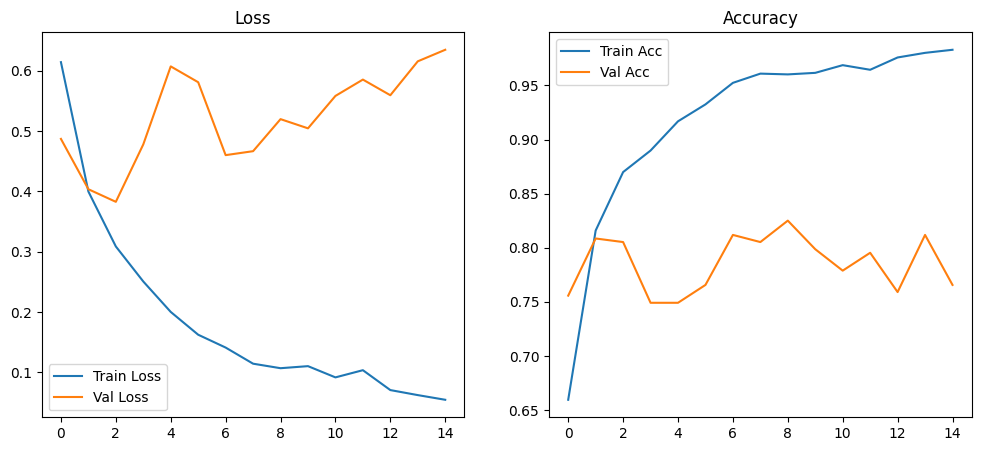


--- Final Evaluation on Test Dataset ---

Final Classification Report (on Test Set):
              precision    recall  f1-score   support

    no_error       0.80      0.81      0.80       134
       error       0.85      0.83      0.84       169

    accuracy                           0.83       303
   macro avg       0.82      0.82      0.82       303
weighted avg       0.83      0.83      0.83       303



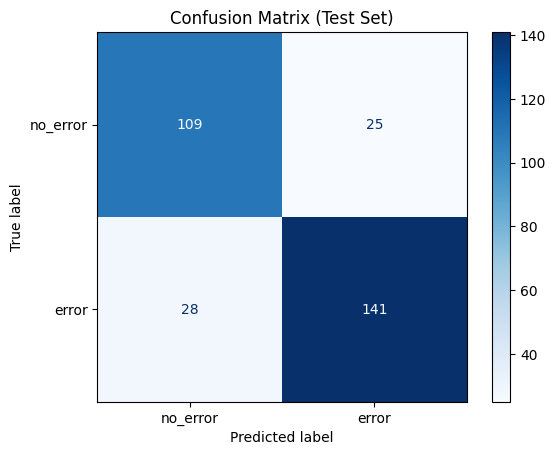


--- Custom Grad-CAM Visualization ---

--- Displaying 10 Sample Test Images with Confidence and Grad-CAM ---

--- Image 1: 13-good_cad.png ---
True Label: no_error
  no_error Confidence: 86.31%
  error Confidence: 13.69%


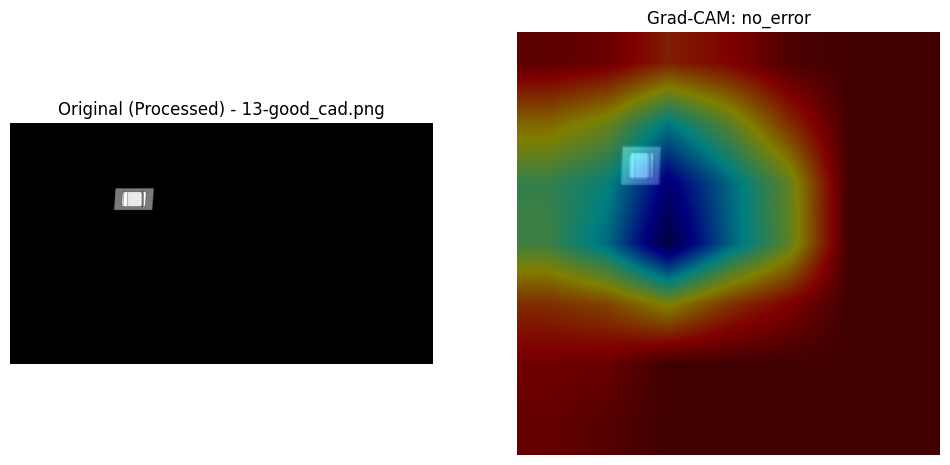

Grad-CAM generated for: 13-good_cad.png. Model predicted: no_error

--- Image 2: 25-good_cad.png ---
True Label: no_error
  no_error Confidence: 76.34%
  error Confidence: 23.66%


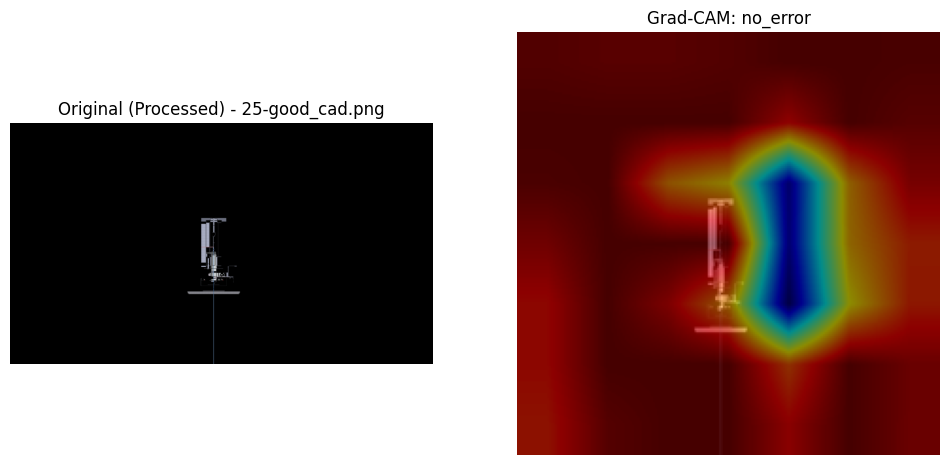

Grad-CAM generated for: 25-good_cad.png. Model predicted: no_error

--- Image 3: 27-good_cad.png ---
True Label: no_error
  no_error Confidence: 85.64%
  error Confidence: 14.36%


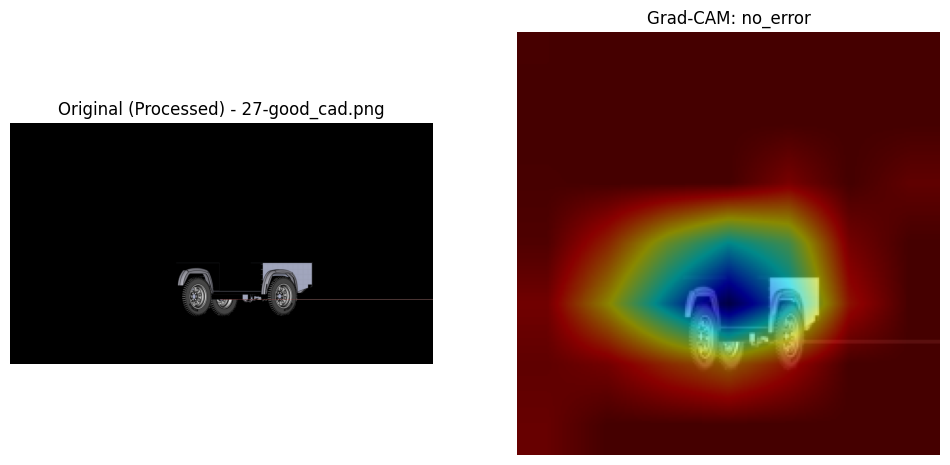

Grad-CAM generated for: 27-good_cad.png. Model predicted: no_error

--- Image 4: 37-good_cad.png ---
True Label: no_error
  no_error Confidence: 72.51%
  error Confidence: 27.49%


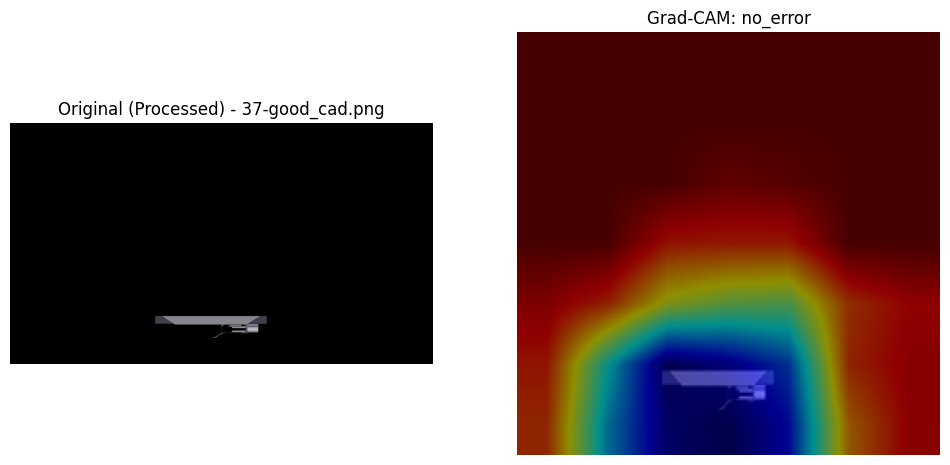

Grad-CAM generated for: 37-good_cad.png. Model predicted: no_error

--- Image 5: C_NoError 2025-06-13 at 12.20.02 PM.png ---
True Label: no_error
  no_error Confidence: 15.57%
  error Confidence: 84.43%


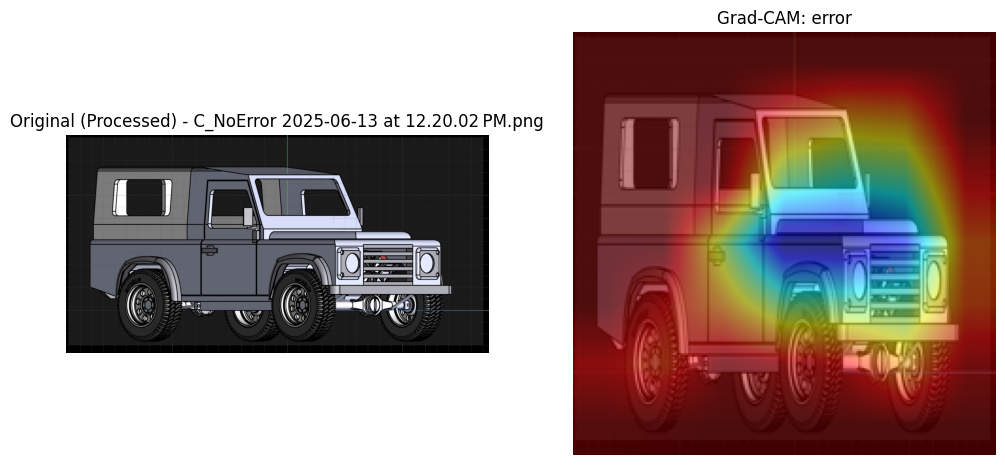

Grad-CAM generated for: C_NoError 2025-06-13 at 12.20.02 PM.png. Model predicted: error

--- Image 6: C_NoError 2025-06-13 at 12.20.16 PM.png ---
True Label: no_error
  no_error Confidence: 16.06%
  error Confidence: 83.94%


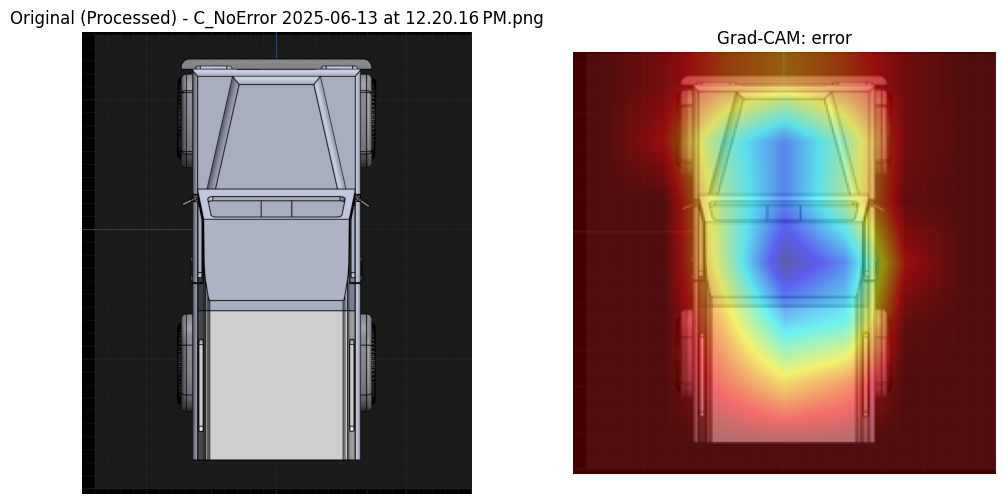

Grad-CAM generated for: C_NoError 2025-06-13 at 12.20.16 PM.png. Model predicted: error

--- Image 7: C_NoError 2025-06-13 at 12.20.29 PM.png ---
True Label: no_error
  no_error Confidence: 29.32%
  error Confidence: 70.68%


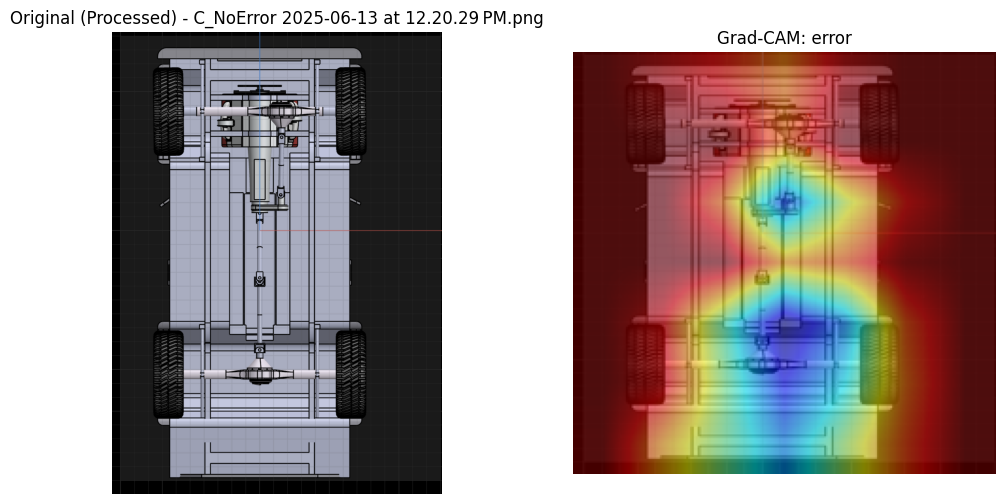

Grad-CAM generated for: C_NoError 2025-06-13 at 12.20.29 PM.png. Model predicted: error

--- Image 8: Cbottomview (2).jpg ---
True Label: no_error
  no_error Confidence: 19.19%
  error Confidence: 80.81%


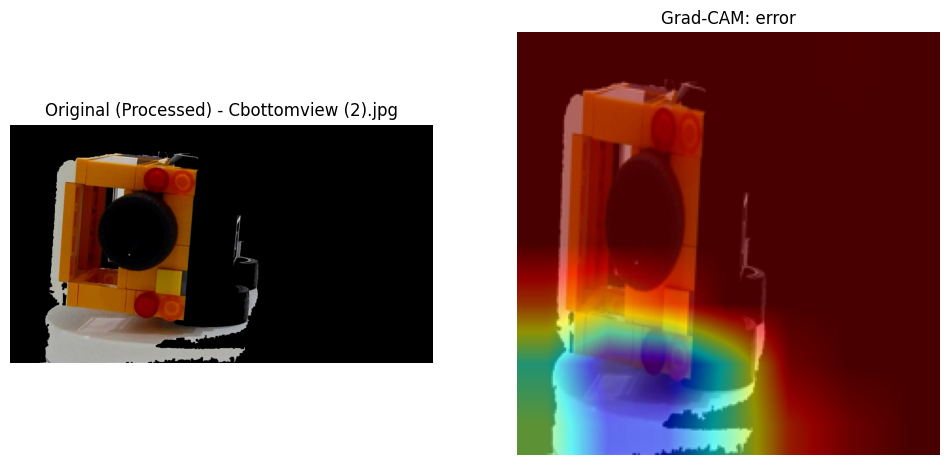

Grad-CAM generated for: Cbottomview (2).jpg. Model predicted: error

--- Image 9: Cbottomview (8).jpg ---
True Label: no_error
  no_error Confidence: 97.42%
  error Confidence: 2.58%


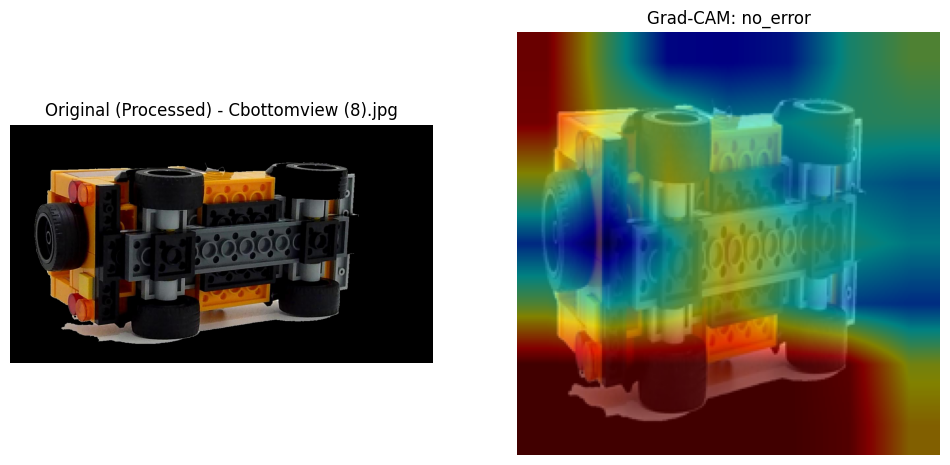

Grad-CAM generated for: Cbottomview (8).jpg. Model predicted: no_error

--- Image 10: Cfrontbacksideimages (1016).jpg ---
True Label: no_error
  no_error Confidence: 84.80%
  error Confidence: 15.20%


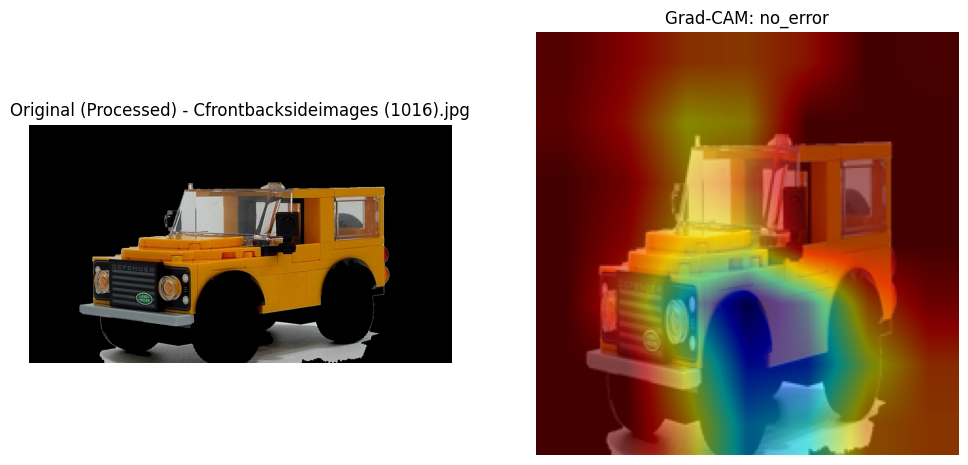

Grad-CAM generated for: Cfrontbacksideimages (1016).jpg. Model predicted: no_error

Finished displaying sample test images.

--- Single Image Prediction (Upload your own image) ---

Upload a single image for prediction:

--- Final Evaluation on Test Dataset ---

Final Classification Report (on Test Set):
              precision    recall  f1-score   support

    no_error       0.80      0.81      0.80       134
       error       0.85      0.83      0.84       169

    accuracy                           0.83       303
   macro avg       0.82      0.82      0.82       303
weighted avg       0.83      0.83      0.83       303



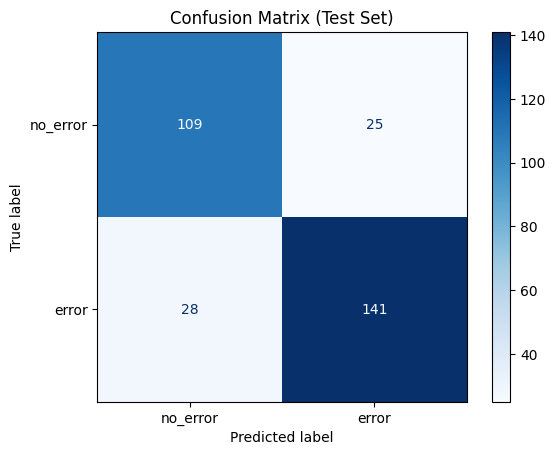


Notebook execution complete.


In [ ]:
# === Section 0: Mount Google Drive and Imports (Combined from Code 1 & Code 2) ===
from google.colab import drive
drive.mount('/content/drive')

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torchvision.utils import make_grid # From Code 1, useful for debugging
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 # For background removal and Grad-CAM
from PIL import Image
from google.colab import files # For interactive file uploads
from torch.nn import functional as F # For softmax, etc.
import time # For training timer
import copy # For deepcopying model state
import warnings # For suppressing warnings
import shutil # For removing directories (background removal setup)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # For evaluation metrics
from sklearn.model_selection import train_test_split # Added for data splitting

warnings.filterwarnings("ignore", category=UserWarning) # Suppress warnings for cleaner output

# Check and set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# === Section 1: Configuration Variables (From Code 2, adapted) ===
# IMPORTANT: Adjust these paths to the EXACT locations of your ORIGINAL data in Google Drive.
# Your new structure: My Drive -> CombinedCarErrorDetectionDataset -> flawed/correct
ORIGINAL_DATASET_ROOT = '/content/drive/MyDrive/CombinedCarErrorDetectionDataset'
ORIGINAL_CORRECT_DIR = os.path.join(ORIGINAL_DATASET_ROOT, 'correct')
ORIGINAL_FLAWED_DIR = os.path.join(ORIGINAL_DATASET_ROOT, 'flawed')

# New root for PROCESSED images (after background removal and splitting)
PROCESSED_DATA_ROOT = '/content/drive/MyDrive/CombinedCarErrorDetectionDataset_processed'
PROCESSED_TRAIN_DATA_ROOT = os.path.join(PROCESSED_DATA_ROOT, 'train')
PROCESSED_VAL_DATA_ROOT = os.path.join(PROCESSED_DATA_ROOT, 'val')
PROCESSED_TEST_DATA_ROOT = os.path.join(PROCESSED_DATA_ROOT, 'test')

# Define the logical classes we care about for reporting.
# ImageFolder will alphabetically map 'correct':0 and 'flawed':1.
# We will use DISPLAY_CLASS_NAMES_REPORT for final reports to map 'correct' (0) -> 'no_error', 'flawed' (1) -> 'error'.
DISPLAY_CLASS_NAMES_REPORT = ['no_error', 'error'] # Mapped to 'correct', 'flawed' respectively by ImageFolder's alphabetical sorting

# Define where to save the best trained model
MODEL_SAVE_DIR = '/content/drive/MyDrive/car_assembly_models'
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)
MODEL_SAVE_PATH = os.path.join(MODEL_SAVE_DIR, 'car_error_classifier_best_combined.pth')

# Training Hyperparameters (Adapted from Code 1 for accuracy, Code 2 for features)
NUM_EPOCHS = 15
BATCH_SIZE = 32
LEARNING_RATE = 1e-4

# Early Stopping Parameters (From Code 2)
EARLY_STOPPING_PATIENCE = 7
MIN_DELTA = 0.001

# Data Split Ratios
TRAIN_RATIO = 0.70
VAL_RATIO = 0.15
TEST_RATIO = 0.15

print("\nConfiguration complete.")
print(f"Original Correct Data Root: {ORIGINAL_CORRECT_DIR}")
print(f"Original Flawed Data Root: {ORIGINAL_FLAWED_DIR}")
print(f"Processed Data Root: {PROCESSED_DATA_ROOT}")
print(f"Model will be saved to: {MODEL_SAVE_PATH}")
print(f"Training for {NUM_EPOCHS} epochs with batch size {BATCH_SIZE} and initial LR {LEARNING_RATE}.")
print(f"Early stopping patience: {EARLY_STOPPING_PATIENCE} epochs with min delta {MIN_DELTA}.")
print(f"Data split ratios: Train {TRAIN_RATIO*100}%, Validation {VAL_RATIO*100}%, Test {TEST_RATIO*100}%.")

# === Section 2: Custom Background Removal and Data Splitting ===
print("\n--- Starting Custom Background Removal and Data Splitting Process ---")
print("This will create a new directory with background-removed images, split into train/val/test.")

# Clean up processed data root to ensure fresh processing
if os.path.exists(PROCESSED_DATA_ROOT):
    print(f"Deleting existing processed data at {PROCESSED_DATA_ROOT}...")
    shutil.rmtree(PROCESSED_DATA_ROOT)
os.makedirs(PROCESSED_DATA_ROOT)

# Create output directories for processed images (and their subfolders for ImageFolder)
for split_folder in ['train', 'val', 'test']:
    os.makedirs(os.path.join(PROCESSED_DATA_ROOT, split_folder, 'correct'), exist_ok=True)
    os.makedirs(os.path.join(PROCESSED_DATA_ROOT, split_folder, 'flawed'), exist_ok=True)

def custom_remove_background(pil_image):
    """
    Simple background removal based on color thresholding for black grid or light table.
    Assumes background is either very dark/black or very light/white/grey.
    Retains the largest connected component (the car).
    """
    img_np = np.array(pil_image.convert('RGB'))
    hsv = cv2.cvtColor(img_np, cv2.COLOR_RGB2HSV)

    # Attempt to detect dark grid background (like in CAD images)
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 30]) # Low V value for dark colors
    mask_black = cv2.inRange(hsv, lower_black, upper_black)

    # Attempt to detect light table background (like in Lego images)
    lower_light = np.array([0, 0, 180]) # High V value for light colors
    upper_light = np.array([180, 50, 255]) # Low S value for desaturated colors
    mask_light = cv2.inRange(hsv, lower_light, upper_light)

    # Combine masks - pixels that are NOT black AND NOT light are potential foreground
    # Invert the masks to get foreground
    foreground_mask = cv2.bitwise_not(mask_black | mask_light)

    # Find contours and fill the largest one (assumed to be the car)
    contours, _ = cv2.findContours(foreground_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        # Create a blank mask and draw the largest contour onto it
        car_mask = np.zeros_like(foreground_mask)
        cv2.drawContours(car_mask, [largest_contour], -1, 255, cv2.FILLED)

        # Apply a small morphological closing to fill small gaps in the mask
        kernel = np.ones((5,5),np.uint8)
        car_mask = cv2.morphologyEx(car_mask, cv2.MORPH_CLOSE, kernel)

        # Apply the mask to the original image
        result = cv2.bitwise_and(img_np, img_np, mask=car_mask)
    else:
        # If no contours found, return original image (or black image)
        result = img_np

    return Image.fromarray(result)

def collect_image_paths(directory):
    """Collects all image file paths from a given directory."""
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

def process_and_save_split_images(file_paths, target_dir, background_remover_func):
    """
    Processes a list of image paths with background removal and saves them to the target directory.
    """
    os.makedirs(target_dir, exist_ok=True)
    for img_path in file_paths:
        filename = os.path.basename(img_path)
        output_path = os.path.join(target_dir, filename)
        try:
            pil_img = Image.open(img_path).convert("RGB")
            processed_pil_img = background_remover_func(pil_img)
            processed_pil_img.save(output_path)
        except Exception as e:
            print(f"    ERROR: Failed to process and save {filename} from {img_path}: {e}")
            try: # Fallback: copy original if processing fails
                shutil.copy(img_path, output_path)
                print(f"    Copied original {filename} to {target_dir} due to processing error.")
            except Exception as copy_e:
                print(f"    Failed to copy original {filename}: {copy_e}")
                continue

# Collect all image paths for 'correct' and 'flawed' classes
all_correct_images = collect_image_paths(ORIGINAL_CORRECT_DIR)
all_flawed_images = collect_image_paths(ORIGINAL_FLAWED_DIR)

print(f"Found {len(all_correct_images)} 'correct' images and {len(all_flawed_images)} 'flawed' images in original directories.")

# Perform the train/val/test splits for 'correct' images
# First split: train_val vs test (85% train_val, 15% test)
train_val_correct, test_correct = train_test_split(all_correct_images, test_size=TEST_RATIO, random_state=42)
# Second split: train vs val from train_val set (70% train, 15% val from original 100%)
# Calculate val_size relative to the train_val set (VAL_RATIO / (TRAIN_RATIO + VAL_RATIO))
val_split_ratio_from_train_val = VAL_RATIO / (TRAIN_RATIO + VAL_RATIO)
train_correct, val_correct = train_test_split(train_val_correct, test_size=val_split_ratio_from_train_val, random_state=42)

# Perform the train/val/test splits for 'flawed' images
train_val_flawed, test_flawed = train_test_split(all_flawed_images, test_size=TEST_RATIO, random_state=42)
train_flawed, val_flawed = train_test_split(train_val_flawed, test_size=val_split_ratio_from_train_val, random_state=42)

# Now, process and save images to their respective new split folders
print("\nProcessing 'correct' images:")
process_and_save_split_images(train_correct, os.path.join(PROCESSED_TRAIN_DATA_ROOT, 'correct'), custom_remove_background)
process_and_save_split_images(val_correct, os.path.join(PROCESSED_VAL_DATA_ROOT, 'correct'), custom_remove_background)
process_and_save_split_images(test_correct, os.path.join(PROCESSED_TEST_DATA_ROOT, 'correct'), custom_remove_background)

print("\nProcessing 'flawed' images:")
process_and_save_split_images(train_flawed, os.path.join(PROCESSED_TRAIN_DATA_ROOT, 'flawed'), custom_remove_background)
process_and_save_split_images(val_flawed, os.path.join(PROCESSED_VAL_DATA_ROOT, 'flawed'), custom_remove_background)
process_and_save_split_images(test_flawed, os.path.join(PROCESSED_TEST_DATA_ROOT, 'flawed'), custom_remove_background)

print("All original images processed and copied to " + PROCESSED_DATA_ROOT)

# Final verification of processed image counts
print("\nVerifying processed image counts:")
total_processed_images = 0
for split_folder in ['train', 'val', 'test']:
    for class_folder in ['correct', 'flawed']: # Updated class folders
        path = os.path.join(PROCESSED_DATA_ROOT, split_folder, class_folder)
        count = len([f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"  {path}: {count} images")
        total_processed_images += count
if total_processed_images == 0:
    print("CRITICAL: No images found in any processed directory. Please check original paths and processing errors.")
    raise ValueError("No processed images found.")
else:
    print(f"Total processed images found: {total_processed_images}")


# === Section 3: Data Transforms, Datasets and Dataloaders (Combined) ===
print("\n--- Preparing Data Loaders ---")

# Transforms from Code 1, applied to processed images
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([ # Same as validation transforms for consistency
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create datasets using torchvision.datasets.ImageFolder for all splits
try:
    image_datasets = {
        'train': datasets.ImageFolder(root=PROCESSED_TRAIN_DATA_ROOT, transform=data_transforms['train']),
        'val': datasets.ImageFolder(root=PROCESSED_VAL_DATA_ROOT, transform=data_transforms['val']),
        'test': datasets.ImageFolder(root=PROCESSED_TEST_DATA_ROOT, transform=data_transforms['test'])
    }

    # Get the internal class names from ImageFolder (e.g., ['correct', 'flawed'] alphabetically sorted)
    MODEL_INTERNAL_CLASSES = image_datasets['train'].classes

    # Create data loaders for batching and shuffling (using BATCH_SIZE from config)
    dataloaders = {x: DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True if x == 'train' else False, num_workers=2)
                   for x in ['train', 'val', 'test']}

    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
    print(f"Training images found: {dataset_sizes['train']}")
    print(f"Validation images found: {dataset_sizes['val']}")
    print(f"Test images found: {dataset_sizes['test']}")

    # --- Class Distribution Verification (From Code 2) ---
    print("\nVerifying class distribution:")
    for split_name, dataset in image_datasets.items():
        labels_in_split = dataset.targets
        print(f"  {split_name} dataset:")
        if len(dataset.classes) < 2:
            print(f"    WARNING: Less than 2 classes found in ImageFolder for {split_name}.")
            print(f"    Found ImageFolder classes: {dataset.classes}")

        # ImageFolder maps 'correct' to 0 and 'flawed' to 1 alphabetically
        count_label_0 = labels_in_split.count(0) # 'correct'
        count_label_1 = labels_in_split.count(1) # 'flawed'

        print(f"    - {DISPLAY_CLASS_NAMES_REPORT[0]} (orig: {MODEL_INTERNAL_CLASSES[0]}): {count_label_0} images")
        print(f"    - {DISPLAY_CLASS_NAMES_REPORT[1]} (orig: {MODEL_INTERNAL_CLASSES[1]}): {count_label_1} images")

    if dataset_sizes['train'] == 0 or dataset_sizes['val'] == 0 or dataset_sizes['test'] == 0:
        print("\nCRITICAL WARNING: One or more datasets are empty. Please check your specified ORIGINAL_DATA_ROOTs and subfolder names (e.g., train/correct, train/flawed etc.).")
        raise ValueError("Empty dataset detected. Cannot proceed.")

except Exception as e:
    print(f"CRITICAL ERROR: Error loading datasets: {e}")
    print(f"Please ensure your Google Drive structure matches: {PROCESSED_TRAIN_DATA_ROOT}/correct/, {PROCESSED_TRAIN_DATA_ROOT}/flawed/, etc.")
    raise # Re-raise the exception to stop execution

# === Section 4: Model Setup and Optimization Configuration (Combined) ===
print("\n--- Setting up Model and Optimizer ---")
# Load a pre-trained ResNet18 model (from Code 1)
model = models.resnet18(pretrained=True)

# Fine-tune layer4 and fc only (from Code 1)
for name, param in model.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# Replace the final fully connected layer (classifier) for our 2 classes
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(MODEL_INTERNAL_CLASSES))
model = model.to(device)

# --- Define Loss function and Optimizer ---
# Calculate class weights for CrossEntropyLoss to handle imbalance (from Code 2)
# ImageFolder will map 'correct' to label 0 and 'flawed' to label 1 alphabetically
train_correct_count = image_datasets['train'].targets.count(0) # 0 is 'correct'
train_flawed_count = image_datasets['train'].targets.count(1) # 1 is 'flawed'
total_train_samples = dataset_sizes['train']

if total_train_samples > 0 and train_correct_count > 0 and train_flawed_count > 0:
    weight_correct = total_train_samples / (len(MODEL_INTERNAL_CLASSES) * train_correct_count)
    weight_flawed = total_train_samples / (len(MODEL_INTERNAL_CLASSES) * train_flawed_count)

    class_weights_list = [0.0] * len(MODEL_INTERNAL_CLASSES)
    class_weights_list[0] = weight_correct # Label 0 is 'correct' (no_error)
    class_weights_list[1] = weight_flawed  # Label 1 is 'flawed' (error)

    class_weights = torch.tensor(class_weights_list, dtype=torch.float).to(device)
    print(f"\nCalculated class weights (for internal labels 0:'correct', 1:'flawed'): {class_weights.tolist()}")
    criterion = nn.CrossEntropyLoss(weight=class_weights)
else:
    print("\nWarning: Cannot calculate class weights due to zero counts in training data or classes. Using unweighted loss.")
    criterion = nn.CrossEntropyLoss()

# Only optimize parameters that require gradients (from Code 1's philosophy, but applied to all trainable params)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=LEARNING_RATE)

# Learning Rate Scheduler (ReduceLROnPlateau from Code 2)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=5)

print("Model, Loss, Optimizer, and Scheduler setup complete.")

# === Section 5: Training Function (Combined and Enhanced) ===
def train_model(model, criterion, optimizer, scheduler, num_epochs=NUM_EPOCHS, model_save_path=MODEL_SAVE_PATH):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    epochs_no_improve = 0

    # Lists to store metrics for plotting (from Code 1)
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}\n{"-" * 10}')

        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()
            running_loss = 0.0
            running_corrects = 0

            # Use correct dataloader based on phase
            current_dataloader = dataloaders[phase]
            current_dataset_size = dataset_sizes[phase]

            for inputs, labels in current_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / current_dataset_size
            epoch_acc = running_corrects.double() / current_dataset_size

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Store metrics for plotting
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accs.append(epoch_acc.item())
            else: # phase == 'val'
                val_losses.append(epoch_loss)
                val_accs.append(epoch_acc.item())
                scheduler.step(epoch_acc) # Step the LR scheduler based on validation accuracy

                # Early stopping logic (from Code 2)
                if epoch_acc > best_acc + MIN_DELTA:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    torch.save(model.state_dict(), model_save_path) # Save best model
                    epochs_no_improve = 0
                else:
                    epochs_no_improve += 1

        if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
            print(f"\nEarly stopping triggered after {epochs_no_improve} epochs without improvement.")
            break

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load the best model weights
    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accs, val_accs # Return metrics for plotting

# --- Train the Model ---
print("\n--- Starting Model Training ---")
trained_model, train_losses, val_losses, train_accs, val_accs = train_model(
    model, criterion, optimizer, scheduler, num_epochs=NUM_EPOCHS, model_save_path=MODEL_SAVE_PATH
)
print("Training finished. Best model saved.")

# === Section 6: Plot Training Graphs (From Code 1) ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.legend()
plt.title("Accuracy")
plt.show()

# === Section 7: Final Evaluation on Test Dataset (From Code 2) ===
print("\n--- Final Evaluation on Test Dataset ---")

# Load the best trained model (in case it's not the last epoch's model)
trained_model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
trained_model.eval() # Set model to evaluation mode

all_preds = []
all_labels = []
all_probs = [] # To store probabilities for custom confidence display later

try:
    with torch.no_grad():
        for inputs, labels in dataloaders['test']:
            inputs = inputs.to(device)
            outputs = trained_model(inputs)
            probs = torch.nn.functional.softmax(outputs, dim=1) # Get probabilities
            preds = torch.argmax(outputs, 1) # Get the predicted class index

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy()) # Store probabilities

    # Print classification report
    print("\nFinal Classification Report (on Test Set):")
    print(classification_report(all_labels, all_preds, target_names=DISPLAY_CLASS_NAMES_REPORT))

    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DISPLAY_CLASS_NAMES_REPORT)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (Test Set)")
    plt.show()

except Exception as e:
    print(f"Error during final test evaluation: {e}")
    print("Please ensure your test dataset is correctly loaded and contains images from both classes.")

# === Section 9: Custom Grad-CAM Visualization (From Code 2, adapted for ResNet18) ===
print("\n--- Custom Grad-CAM Visualization ---")

class CustomGradCAM:
    def __init__(self, model, target_layer_name='layer4'): # Default to 'layer4' for ResNet18
        self.model = model
        self.target_layer = None

        # Recursively find the target layer
        def find_layer(module, name_parts):
            if not name_parts:
                return module
            for name, child in module.named_children():
                if name == name_parts[0]:
                    return find_layer(child, name_parts[1:])
            return None

        # For ResNet, layer4 is a Sequential module
        self.target_layer = find_layer(model, target_layer_name.split('.'))

        if not self.target_layer:
            raise ValueError(f"Target layer '{target_layer_name}' not found in model.")

        self.feature_map_hook = None
        self.gradient_hook = None
        self.activations = None
        self.gradients = None

    def _save_activation(self, module, input, output):
        self.activations = output.cpu().data

    def _save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].cpu().data

    def generate_cam(self, input_tensor, target_category=None):
        self.model.eval()

        # Register hooks
        self.feature_map_hook = self.target_layer.register_forward_hook(self._save_activation)
        self.gradient_hook = self.target_layer.register_full_backward_hook(self._save_gradient)

        # Perform forward pass
        with torch.enable_grad(): # Ensure gradients are computed for the input
            output = self.model(input_tensor)

        # If no target category is specified, use the predicted one
        if target_category is None:
            target_category = torch.argmax(output).item()

        # Zero gradients before backward pass
        self.model.zero_grad()

        # Backward pass for the target category
        one_hot = torch.zeros_like(output).to(output.device)
        one_hot[0][target_category] = 1 # Assuming batch size of 1
        output.backward(gradient=one_hot, retain_graph=False)

        # Remove hooks
        self.feature_map_hook.remove()
        self.gradient_hook.remove()

        # Check if activations or gradients were captured
        if self.activations is None or self.gradients is None:
            raise RuntimeError("Grad-CAM: Activations or gradients were not captured. Check hooks or model layers.")

        # Get gradients and activations
        grad_val = self.gradients.numpy()[0] # [0] for batch dim
        act_val = self.activations.numpy()[0] # [0] for batch dim

        # Pool the gradients across the channels to get the importance weights
        weights = np.mean(grad_val, axis=(1, 2))

        # Build the CAM
        cam = np.zeros(act_val.shape[1:], dtype=np.float32)
        for i, w in enumerate(weights):
            cam += w * act_val[i]

        # ReLU for CAM (discard negative values)
        cam = np.maximum(cam, 0)
        # Resize CAM to match input image size (H, W)
        cam = cv2.resize(cam, (input_tensor.shape[3], input_tensor.shape[2]))
        cam = cam - np.min(cam)
        if np.max(cam) == 0:
            return cam
        cam = cam / np.max(cam)
        return cam

try:
    # Initialize Custom Grad-CAM for ResNet18, targeting 'layer4'
    cam_instance = CustomGradCAM(model=trained_model, target_layer_name='layer4')
except ValueError as e:
    print(f"Error initializing Grad-CAM: {e}. Grad-CAM visualization might not work.")
    cam_instance = None

# MODIFIED visualize_grad_cam function to accept PIL image directly
def visualize_grad_cam(pil_image_original, model_to_use, transform, cam_instance_obj, background_remover, image_identifier=""):
    """
    Generates and displays Grad-CAM heatmap for a given PIL image.
    Args:
        pil_image_original (PIL.Image): The original PIL image.
        model_to_use (torch.nn.Module): The trained model.
        transform (torchvision.transforms.Compose): The transformation pipeline for the model input.
        cam_instance_obj (CustomGradCAM): An instance of the CustomGradCAM class.
        background_remover (function): The custom_remove_background function.
        image_identifier (str): An optional string to identify the image in plots/prints.
    """
    if cam_instance_obj is None:
        print("Grad-CAM is not initialized. Cannot visualize.")
        return

    # Apply background removal
    try:
        processed_pil_img = background_remover(pil_image_original)
    except Exception as e:
        print(f"Warning: Background removal failed for {image_identifier}. Using original image. Error: {e}")
        processed_pil_img = pil_image_original

    # Apply model transforms for prediction and CAM generation
    input_tensor_for_model = transform(processed_pil_img).unsqueeze(0).to(device)

    # Get model prediction and probabilities
    model_to_use.eval()
    with torch.no_grad():
        output = model_to_use(input_tensor_for_model)
        predicted_category = torch.argmax(output).item()

    # Generate the CAM
    grayscale_cam = cam_instance_obj.generate_cam(input_tensor=input_tensor_for_model, target_category=predicted_category)

    # Convert processed_pil_img to numpy for visualization (HWC, RGB, 0-1)
    # FIX: Resize processed_pil_img to 224x224 to match the heatmap
    rgb_img_for_display = np.float32(processed_pil_img.resize((224, 224)).convert('RGB')) / 255

    # Overlay CAM on image
    heatmap = cv2.applyColorMap(np.uint8(255 * grayscale_cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam_overlay = heatmap + rgb_img_for_display
    cam_overlay = cam_overlay / np.max(cam_overlay)

    # Display
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(processed_pil_img)
    ax[0].set_title(f"Original (Processed) - {image_identifier}")
    ax[0].axis('off')

    ax[1].imshow(cam_overlay)
    ax[1].set_title(f"Grad-CAM: {DISPLAY_CLASS_NAMES_REPORT[predicted_category]}")
    ax[1].axis('off')
    plt.show()

    print(f"Grad-CAM generated for: {image_identifier}. Model predicted: {DISPLAY_CLASS_NAMES_REPORT[predicted_category]}")


# === NEW Section 8: Displaying 10 Sample Test Images with Confidence and Grad-CAM ===
print("\n--- Displaying 10 Sample Test Images with Confidence and Grad-CAM ---")

# Access the test dataset directly to get image paths and then load them.
# This ensures we get the original image for background removal and Grad-CAM overlay.
test_image_paths_and_labels = image_datasets['test'].samples

num_images_to_display = 10
displayed_count = 0

for i in range(len(test_image_paths_and_labels)):
    if displayed_count >= num_images_to_display:
        break

    image_path, true_label_idx = test_image_paths_and_labels[i]
    image_name = os.path.basename(image_path)

    # Load the original PIL image
    original_pil_img = Image.open(image_path).convert('RGB')

    # Apply the same transforms as the test_loader would, but on a single image.
    # This tensor will be used for prediction and Grad-CAM generation.
    input_tensor_for_model = data_transforms['test'](original_pil_img).unsqueeze(0).to(device)

    # Get model prediction and probabilities
    trained_model.eval()
    with torch.no_grad():
        outputs = trained_model(input_tensor_for_model)
        probs = torch.softmax(outputs, dim=1)[0]
        predicted_idx = torch.argmax(probs).item()

    # Display confidence levels for each class
    print(f"\n--- Image {displayed_count + 1}: {image_name} ---")
    print(f"True Label: {DISPLAY_CLASS_NAMES_REPORT[true_label_idx]}")
    for class_idx, class_name in enumerate(DISPLAY_CLASS_NAMES_REPORT):
        confidence = probs[class_idx].item() * 100
        print(f"  {class_name} Confidence: {confidence:.2f}%")

    # Call the modified visualize_grad_cam function
    visualize_grad_cam(original_pil_img, trained_model, data_transforms['test'], cam_instance, custom_remove_background, image_identifier=image_name)

    displayed_count += 1

print("\nFinished displaying sample test images.")


# --- Section 10: Single Image Prediction (Original from Code 2, kept for user uploads) ---
print("\n--- Single Image Prediction (Upload your own image) ---")

def predict_single_image(image_path, model_to_use, transform, background_remover):
    """
    Predicts the class of a single image and displays it.
    This version uses the custom_remove_background function.
    """
    try:
        pil_img = Image.open(image_path).convert("RGB")
        processed_pil_img = background_remover(pil_img)
    except Exception as e:
        print(f"Warning: Image loading or background removal failed for {os.path.basename(image_path)}. Using original image. Error: {e}")
        processed_pil_img = Image.open(image_path).convert("RGB")

    img_t = transform(processed_pil_img).unsqueeze(0).to(device)

    model_to_use.eval()
    with torch.no_grad():
        output = model_to_use(img_t)
        probs = torch.nn.functional.softmax(output[0], dim=0)
        predicted_idx = torch.argmax(probs)

        display_prediction_name = DISPLAY_CLASS_NAMES_REPORT[predicted_idx.item()]
        confidence = probs[predicted_idx.item()].item() * 100

    plt.imshow(processed_pil_img)
    plt.title(f"Predicted: {display_prediction_name} ({confidence:.1f}%)")
    plt.axis('off')
    plt.show()

    print(f"Prediction for {os.path.basename(image_path)}: {display_prediction_name} with {confidence:.1f}% confidence.")

print("\nUpload a single image for prediction:")
# --- IMPORTANT: Uncomment the following lines to enable file upload in Colab ---
# uploaded_single = files.upload()
# if uploaded_single:
#   for filename in uploaded_single.keys():
#       print(f"User uploaded file: {filename}")
#       uploaded_image_path = filename
#       predict_single_image(uploaded_image_path, trained_model, data_transforms['test'], custom_remove_background)
# else:
#   print("No file uploaded for single image prediction.")


# === Section 11: Final Evaluation on Test Dataset (Original from Code 2) ===
# This section is a duplicate of Section 7. Keeping it as is, assuming it's intended
# for a re-run of evaluation or a separate display.
print("\n--- Final Evaluation on Test Dataset ---")

# Load the best trained model (in case it's not the last epoch's model)
trained_model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
trained_model.eval() # Set model to evaluation mode

all_preds = []
all_labels = []

try:
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        outputs = trained_model(inputs)
        preds = torch.argmax(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Print classification report
    print("\nFinal Classification Report (on Test Set):")
    # Use DISPLAY_CLASS_NAMES_REPORT for target_names to map ImageFolder's output to our logical names
    print(classification_report(all_labels, all_preds, target_names=DISPLAY_CLASS_NAMES_REPORT))

    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DISPLAY_CLASS_NAMES_REPORT)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (Test Set)")
    plt.show()

except Exception as e:
    print(f"Error during final test evaluation: {e}")
    print("Please ensure your test dataset is correctly loaded and contains images from both classes.")

print("\nNotebook execution complete.")


In [ ]:
# === Section 0: Mount Google Drive and Imports ===
from google.colab import drive
drive.mount('/content/drive')

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from torchvision.utils import make_grid
from torchmetrics.classification import MulticlassConfusionMatrix
from torchmetrics import Accuracy, Precision, Recall, F1Score
from torchvision.transforms import InterpolationMode
import cv2
import random
from torch.utils.data import Subset
import zipfile
from PIL import Image
import pandas as pd

# === Section 1: Configurations ===
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 20

torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# === Section 2: Paths ===
BASE_DIR = "/content/drive/My Drive/CombinedCarErrorDetectionDataset/SB_DatasetSplits"
SB_SPLIT_PATH = BASE_DIR
OUTPUT_DIR = "/content/drive/My Drive/ModelOutputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Section 3: Data Preparation ===
MODEL_INTERNAL_CLASSES = ['good', 'bad']

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.RandomResizedCrop(224, scale=(0.6, 1.0)),
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
        transforms.RandomPerspective(distortion_scale=0.4, p=0.5),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Unzip splits
for zip_file in ['good.zip', 'bad.zip']:
    zip_path = os.path.join(SB_SPLIT_PATH, zip_file)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(SB_SPLIT_PATH)

# Load datasets
image_datasets = {
    'train': datasets.ImageFolder(os.path.join(SB_SPLIT_PATH, 'train'), data_transforms['train']),
    'val': datasets.ImageFolder(os.path.join(SB_SPLIT_PATH, 'val'), data_transforms['val']),
    'test': datasets.ImageFolder(os.path.join(SB_SPLIT_PATH, 'test'), data_transforms['test'])
}

dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    for x in ['train', 'val', 'test']
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes

# === Section 4: Model Setup ===
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # Freeze feature extractor

num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(num_features, len(MODEL_INTERNAL_CLASSES))
)
model = model.to(DEVICE)

# Class weights
class_counts = np.bincount([label for _, label in image_datasets['train']])
class_weights = torch.tensor(1. / class_counts, dtype=torch.float).to(DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)
optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=LEARNING_RATE,
    weight_decay=1e-4
)

# === Section 5: Training Loop ===
def train_model(model, criterion, optimizer, num_epochs=EPOCHS):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(DEVICE)
                labels = labels.to(DEVICE)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accs.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accs.append(epoch_acc.item())

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s")
    print(f"Best val Acc: {best_acc:.4f}")

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accs, val_accs

model, train_losses, val_losses, train_accs, val_accs = train_model(model, criterion, optimizer)

# === Section 6: Evaluation ===
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ModuleNotFoundError: No module named 'torchmetrics'